# EDA

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [ ]:
df_raw = pd.read_csv('datos_preprocesados.csv')
df = df_raw.copy()

In [ ]:
df['fecha'] = pd.to_datetime(df['fecha'])

In [ ]:
df.dtypes

# Análisis estadístico descriptivo

In [ ]:
# Magnitudes estadísticas básicas
df.drop(columns=['fecha']).describe(include='all').round(2)

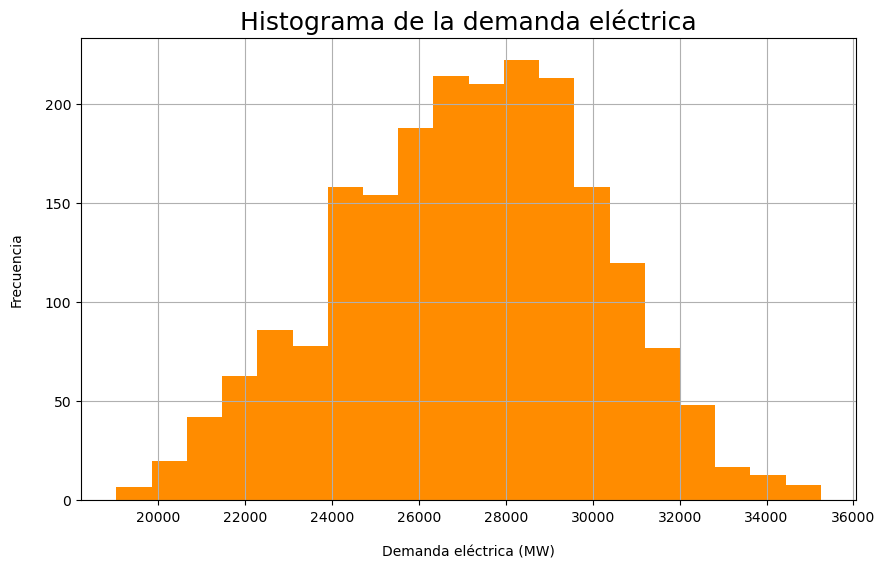

In [15]:
plt.figure(figsize=(10, 6))
df['demanda'].hist(bins=20, color='darkorange')
plt.title('Histograma de la demanda eléctrica', fontsize=18)
plt.xlabel('Demanda eléctrica (MW)', labelpad=15)
plt.ylabel('Frecuencia', labelpad=15)
plt.show()


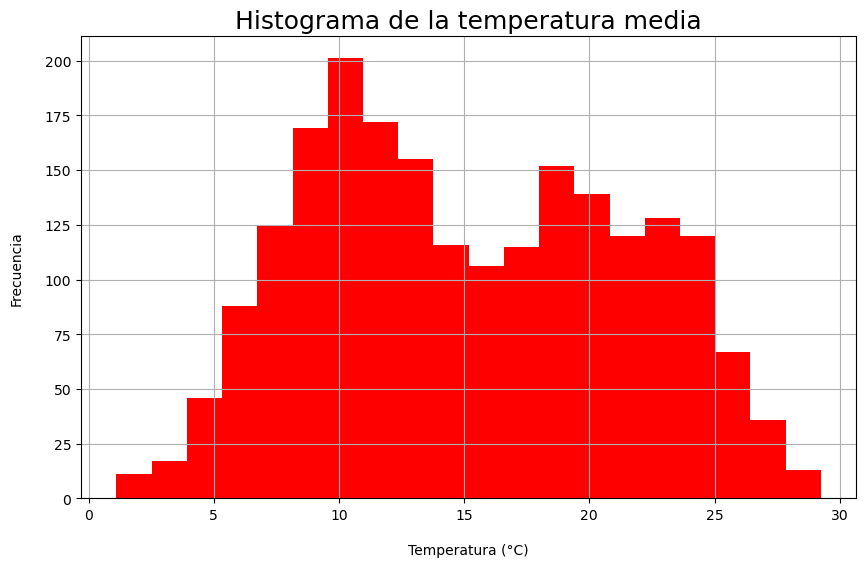

In [16]:
plt.figure(figsize=(10, 6))
df['tmed'].hist(bins=20, color='red')
plt.title('Histograma de la temperatura media', fontsize=18)
plt.xlabel('Temperatura (°C)', labelpad=15)
plt.ylabel('Frecuencia', labelpad=15)
plt.show()

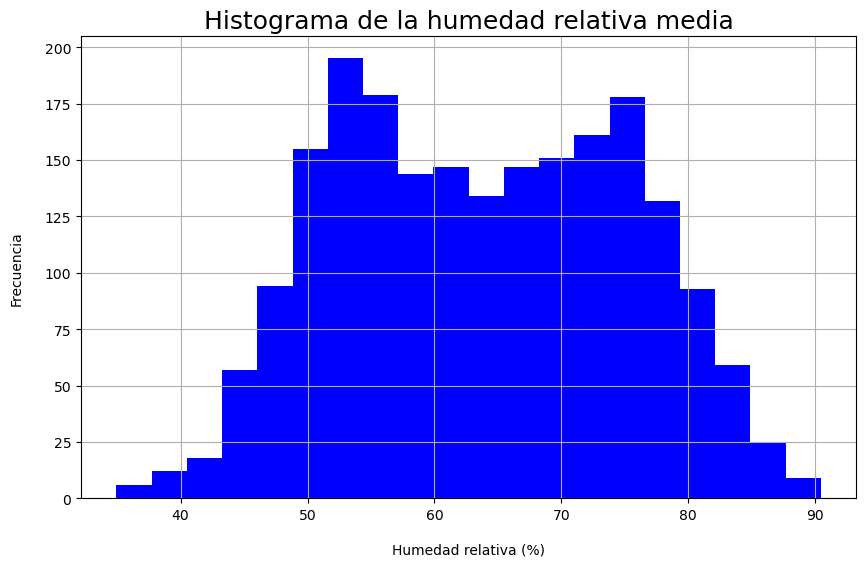

In [21]:
plt.figure(figsize=(10, 6))
df['hrmed'].hist(bins=20, color='blue')
plt.title('Histograma de la humedad relativa media', fontsize=18)
plt.xlabel('Humedad relativa (%)', labelpad=15)
plt.ylabel('Frecuencia', labelpad=15)
plt.show()

In [ ]:
# Mostrar histogramas para cada columna
#for columna in df.columns:
 #   # Verificar si la columna es numérica para evitar errores
  #  if pd.api.types.is_numeric_dtype(df[columna]):
   #     plt.figure(figsize=(10, 6))
    #    df[columna].hist(bins=20,  color='darkorange')
     #   plt.title(f'Histograma de {columna}')
      #  plt.xlabel('Valor')
       # plt.ylabel('Frecuencia')
        #plt.show()


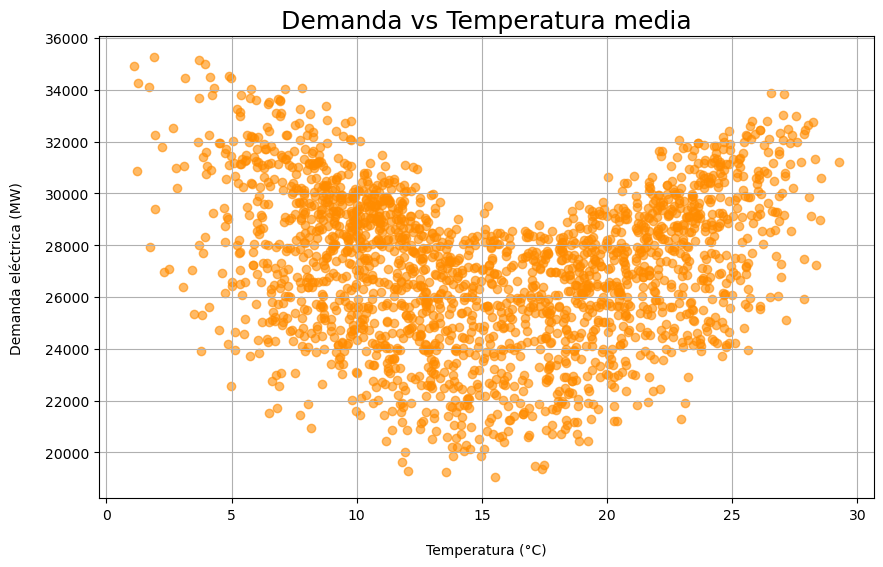

In [22]:
# Crear un gráfico de dispersión de 'demanda' vs 'tmed'
plt.figure(figsize=(10, 6))
plt.scatter(df['tmed'], df['demanda'], alpha=0.6, color='darkorange')
plt.title('Demanda vs Temperatura media', fontsize = 18)
plt.ylabel('Demanda eléctrica (MW)', labelpad=15)
plt.xlabel('Temperatura (°C)', labelpad=15)
plt.grid(True)
plt.show()

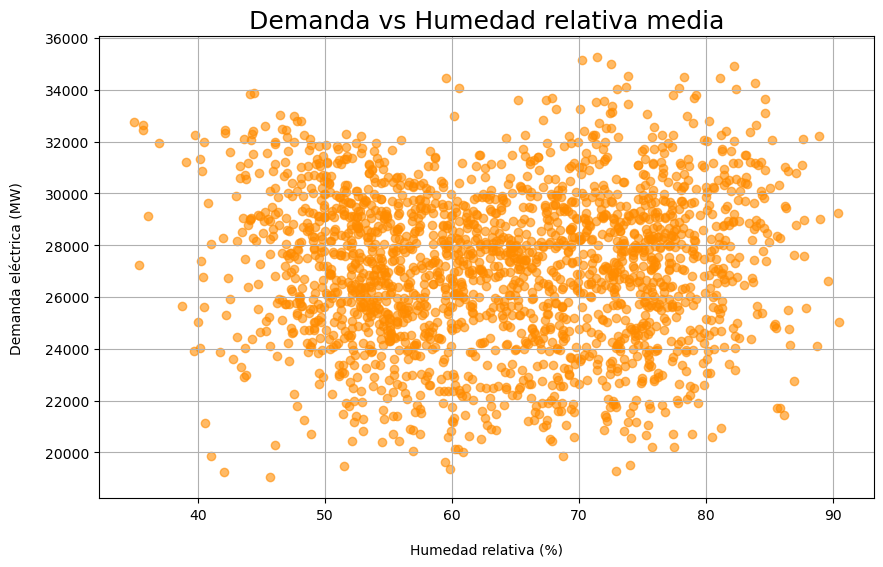

In [23]:
# Crear un gráfico de dispersión de 'demanda' vs 'tmed'
plt.figure(figsize=(10, 6))
plt.scatter(df['hrmed'], df['demanda'], alpha=0.6, color='darkorange')
plt.title('Demanda vs Humedad relativa media', fontsize = 18)
plt.ylabel('Demanda eléctrica (MW)', labelpad=15)
plt.xlabel('Humedad relativa (%)', labelpad=15)
plt.grid(True)
plt.show()

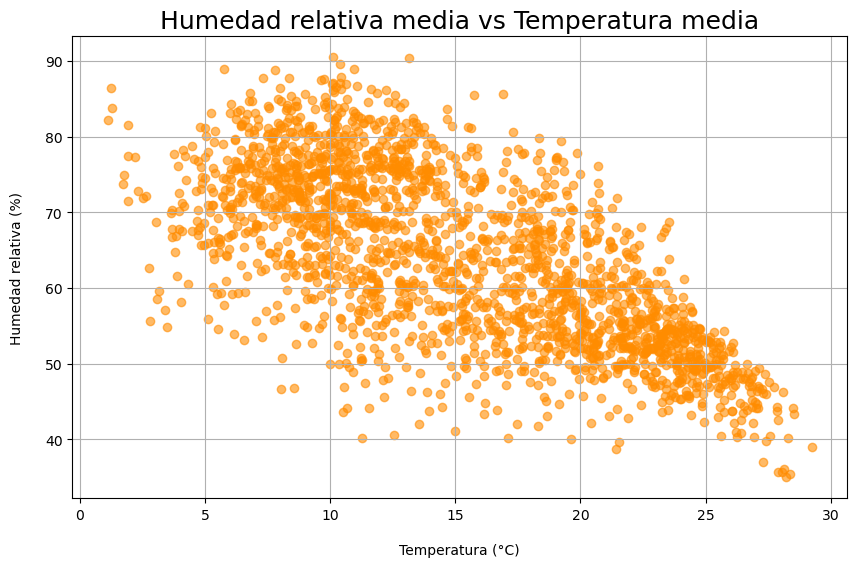

In [24]:
# Crear un gráfico de dispersión de 'tmed' vs 'hrmedia'
plt.figure(figsize=(10, 6))
plt.scatter(df['tmed'], df['hrmed'], alpha=0.6, color='darkorange')
plt.title('Humedad relativa media vs Temperatura media', fontsize = 18)
plt.xlabel('Temperatura (°C)', labelpad=15)
plt.ylabel('Humedad relativa (%)', labelpad=15)
plt.grid(True)
plt.show()

# Matriz de correlaciones

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la matriz de correlaciones
corr_matrix = df.corr()

# Configurar la figura
plt.figure(figsize=(16, 12))  # Aumenta la altura

# Crear el heatmap
sns.heatmap(corr_matrix, 
            vmin=-1, vmax=1, 
            cmap='Oranges', 
            square =True,
            annot=True, 
            fmt='.2f', 
            annot_kws={"size": 10}, 
            cbar_kws={"shrink": 0.8}, 
            yticklabels=True,
           linewidth=.5,)  # Asegúrate de mostrar todas las etiquetas

# Título del gráfico
plt.title('Matriz de Correlaciones', fontsize=20)

# Mostrar el gráfico
plt.show()


# Análisis gráfico de la serie

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Supongamos que df es tu DataFrame que contiene los datos
# df = pd.read_csv('tu_archivo.csv')  # Descomenta y ajusta esto si necesitas cargar los datos desde un archivo

# Asegúrate de que la columna 'fecha' esté en formato de fecha
df['fecha'] = pd.to_datetime(df['fecha'])

# Filtrar los datos para que solo contengan registros de 2019 a 2024
df_filtered = df[(df['fecha'] >= '2019-01-01') & (df['fecha'] <= '2024-09-18')]

# Configurar la figura
plt.figure(figsize=(14, 7))

# Graficar todos los datos de demanda a lo largo del tiempo
plt.plot(df_filtered['fecha'], df_filtered['demanda'], linestyle='-', color='darkorange', label='Demanda Real')

# Ajustar etiquetas y título
plt.title('Demanda a lo largo del tiempo (2019-2024)', fontsize=16)
plt.xlabel('Fecha', fontsize=14, labelpad=15)
plt.ylabel('Demanda eléctrica (MW)', fontsize=14, labelpad=15)
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor legibilidad
plt.grid()

# Mostrar leyenda
plt.legend()


# Mostrar el gráfico
plt.show()  # Muestra el


In [ ]:
# Configurar la figura
plt.figure(figsize=(14, 7))

# Graficar fecha vs temperatura
plt.plot(df['fecha'], df['tmed'], linestyle='-', color='red', label='Temperatura')

# Ajustar etiquetas y título
plt.title('Temperatura media a lo largo del tiempo (2019-2024)', fontsize=16)
plt.xlabel('Fecha', fontsize=14, labelpad=15)
plt.ylabel('Temperatura (°C)', fontsize=14, labelpad=15)
plt.xticks(rotation=45)
plt.grid()

# Mostrar leyenda
plt.legend()


# Mostrar el gráfico
plt.tight_layout()  # Ajusta el diseño para evitar cortes
plt.show()

In [ ]:
# Configurar la figura
plt.figure(figsize=(14, 7))

# Graficar fecha vs temperatura
plt.plot(df['fecha'], df['hrmedia'], linestyle='-', color='b', label='Temperatura')

# Ajustar etiquetas y título
plt.title('Humedad relativa media a lo largo del tiempo (2019-2024)', fontsize=16)
plt.xlabel('Fecha', fontsize=14, labelpad=15)
plt.ylabel('Humedad relativa (%)', fontsize=14, labelpad=15)
plt.xticks(rotation=45)
plt.grid()

# Mostrar leyenda
plt.legend()

# Mostrar el gráfico
plt.tight_layout()  # Ajusta el diseño para evitar cortes
plt.show()

# Box plots

In [ ]:
df.set_index('fecha', inplace=True)
df = df.asfreq('D')

In [ ]:
# Supongamos que df es un DataFrame ya definido con la columna 'demanda' y un índice de fechas
# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(10, 6))

# Crear el boxplot utilizando el trimestre del índice
df.boxplot(column='demanda', by=df.index.quarter, ax=ax)

# Graficar la mediana por trimestre
medianas = df.groupby(df.index.quarter)['demanda'].median()
medianas.plot(style='o-', linewidth=2, ax=ax, color='orange', markersize=6, label='Mediana', x=medianas.index)

# Configuración de los ejes y título
ax.set_ylabel('Demanda eléctrica (MW)', fontsize=14, labelpad=15)
plt.xlabel('Trimestres', fontsize=14, labelpad=15)
ax.set_title('Distribución de la demanda por trimestres', fontsize=16)
ax.set_xticklabels(['Trim 1', 'Trim 2', 'Trim 3', 'Trim 4'])  # Nombres de los trimestres
ax.legend()

# Eliminar el título por defecto del boxplot
fig.suptitle('')
plt.grid()

# Mostrar el gráfico
plt.tight_layout()  # Ajusta el diseño para evitar cortes
plt.show()

In [ ]:
# Crear la figura y el eje
#fig, ax = plt.subplots(figsize=(16, 10))

# Crear el boxplot usando el índice de fechas para agrupar por mes
#df.boxplot(column='demanda', by=df.index.month, ax=ax)

# Graficar la mediana
#df.groupby(df.index.month)['demanda'].median().plot(style='o-', linewidth=2, ax=ax, color='orange', markersize=6, label='Mediana')

# Configuración de los ejes y título
#ax.set_ylabel('Demanda')
#ax.set_title('Distribución de la Demanda por Mes')
#ax.legend()

# Eliminar el título por defecto del boxplot
#fig.suptitle('')

# Mostrar el gráfico
#plt.tight_layout()  # Ajusta el diseño para evitar cortes
#plt.show()

In [ ]:
# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(10, 6))

# Crear el boxplot usando el día de la semana del índice (1 = Lunes, 7 = Domingo)
df.boxplot(column='demanda', by=df.index.weekday + 1, ax=ax)

# Graficar la mediana
medianas = df.groupby(df.index.weekday)['demanda'].median()

# Ajustar los índices de las medianas para que vayan de 1 a 7
medianas.index = medianas.index + 1  # Aumentar los índices para que comiencen desde 1

# Graficar las medianas
medianas.plot(style='o-', linewidth=2, ax=ax, color='orange', markersize=6, label='Mediana')

# Configuración de los ejes y título 
ax.set_ylabel('Demanda eléctrica (MW)', fontsize=14, labelpad=15)
plt.xlabel('Días de la semana', fontsize=14, labelpad=15)
ax.set_title('Distribución de la demanda por días de la semana', fontsize=16)
ax.set_xticklabels(['Lun', 'Mar', 'Mié', 'Jue', 'Vie', 'Sáb', 'Dom'])  # Nombres de los días
ax.legend()

# Eliminar el título por defecto del boxplot
fig.suptitle('')
plt.grid()
# Mostrar el gráfico
plt.show()

In [ ]:
# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(10,6))

# Crear el boxplot utilizando la variable 'festivo' (0 o 1)
df.boxplot(column='demanda', by=df['festivo'], ax=ax, positions=[0, 1])  # Posiciones exactas para 0 y 1

# Graficar la mediana por festivo (0 = no festivo, 1 = festivo)
medianas = df.groupby(df['festivo'])['demanda'].median()
medianas.plot(style='o-', linewidth=2, ax=ax, color='orange', markersize=6, label='Mediana', x=medianas.index)

# Configuración de los ejes y título
ax.set_ylabel('Demanda eléctrica (MW)', fontsize=14, labelpad=15)
plt.xlabel('Festivos', fontsize=14, labelpad=15)
ax.set_title('Distribución de la demanda por festivos', fontsize=16)
ax.set_xticks([0, 1])  # Posicionar etiquetas en 0 y 1
ax.set_xticklabels(['No Festivo', 'Festivo'])  # Nombres de las categorías
ax.legend()

# Eliminar el título por defecto del boxplot
fig.suptitle('')

# Ajustar el diseño para evitar cortes
plt.tight_layout()
plt.grid()
# Mostrar el gráfico
plt.show()

# Análisis de series temporales

In [ ]:
# Filtrar el DataFrame para solo incluir el año 2022
df_2022 = df['2022']

# Comprobar que hay datos
#print(df_2022.head())

# Descomponer la serie temporal
decomposition = seasonal_decompose(df_2022['demanda'], model='additive')

# Crear subplots con tamaño específico
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 8))  # Ajusta el tamaño aquí

# Asignar títulos
titles = ['No descomposición', 'Tendencia', 'Estacionalidad', 'Residuales']
data = [df_2022['demanda'], decomposition.trend, decomposition.seasonal, decomposition.resid]

# Graficar cada componente
for i, ax in enumerate(axes):
    if i == 0:  # Para la serie original
        data[i].plot(ax=ax, title=titles[i], color='darkorange')
    else:  # Para las demás componentes
        data[i].plot(ax=ax, title=titles[i], color='darkorange')
    
    ax.set_ylabel('Demanda')  # Etiqueta en el eje y
    ax.set_xticklabels([])  # Ocultar las etiquetas del eje x

# Ajustar el espaciado entre los subplots
plt.subplots_adjust(hspace=0.5)  # Aumenta el espacio vertical entre los subplots
 
plt.show()

In [ ]:
# Gráfico autocorrelación
# ==================================================================
fig, ax = plt.subplots(figsize=(10, 6))
plot_acf(df_2022['demanda'], ax=ax, lags=100, color='darkorange')
plt.title('Autocorrelación de la demanda (2022)', fontsize=16)
plt.xlabel('Lags (días)', fontsize=14, labelpad=15)
plt.ylabel('Autocorrelación', fontsize=14, labelpad=15)
plt.grid()
# Mostrar el gráfico
plt.show()

In [ ]:
# Gráfico autocorrelación parcial
# ==============================================================================
fig, ax = plt.subplots(figsize=(10, 6))
plot_pacf(df_2022['demanda'], ax=ax, lags=100, color='darkorange')
plt.title('Autocorrelación parcial de la demanda (2022)', fontsize=16)
plt.xlabel('Lags (días)', fontsize=14, labelpad=15)
plt.ylabel('Autocorrelación', fontsize=14, labelpad=15)
plt.grid()
plt.show()